In [1]:
%pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


A Netflix foi o primeiro streaming de sucesso, revolucionando a relação da sociedade com o entretenimento. A plataforma contém diversos filmes e séries do mundo todo selecionados de maneira estratégica. Nos últimos tempos, porém, a Netflix vem perdendo espaço no mercado devido ao surgimento de outras plataformas. Então, reunimos uma base de dados contendo informações sobre os filmes na netflix, atualizada há um ano, que torna capaz a análise de quais os tipos de filme que têm a maior satisfação dos usuários afim de procurar padrões e saber como se manter relevante no espaço.

Com isso, queremos responder a seguinte pergunta:
    . Com as informações que temos sobre os filmes, conseguimos determinar a popularidade dos mesmos?

A variável target que escolhemos então foi popularidade dos filmes, esse dataset possui filmes e séries, então começamos fazendo a análise exploratória de todos os dados, modificando alguns para facilitar a análise.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import re 
import import_ipynb
import seaborn as sns

In [4]:
dados = pd.read_csv('titles.csv')

Como esse dataset possui filmes e séries, começamos filtrando a base de dados para obter somente filmes

In [5]:
filmes = dados.loc[dados.type=='MOVIE']
filmes.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800


Usamos o .describe(), ferramenta que nos retorna várias informações importantes sobre o dado, como a média, desvio padrão, etc, para analisar as informações tanto da target, quanto das features

In [6]:
filmes['tmdb_popularity'].describe()

count    3682.000000
mean       20.314546
std        78.066405
min         0.009442
25%         2.509250
50%         5.862000
75%        14.657250
max      2274.044000
Name: tmdb_popularity, dtype: float64

A target escolhida para avaliar quais filmes apresentam maior satisfação dos usuários foi a popularidade de acordo com o tmdb. Esta varia de 0.009442 a 2274.044000, pode-se observar que 50% da popularidade dos filmes na Netflix está abaixo de 5, mas a média é 20, logo a popularidade de alguns filmes difere muito da maioria e dificulta a análise dos dados, dispersando muito o eixo. Para as variáveis quantitativas com valores que fogem muito da média pode ser feito a elimição dos valores extremos a partir dos cálculos de limite superior e inferior que são LS: Q3 + 1,5 IQ e LI: Q1 - 1,5 IQ, sendo IQ= Q3 - Q1. Para observarmos a dispersão dos dados ainda melhor, fizemos o gráfico de densidade dos dados boxplot

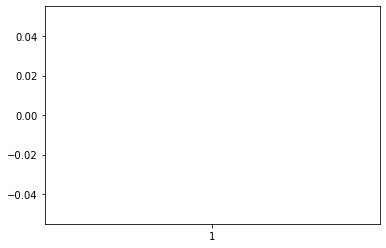

In [7]:
plt.boxplot(filmes['tmdb_popularity'])
plt.show()

Provando ainda mais a necessidade de eliminar valores extremos, já que os dados estão tão dispersos que nem chegam a aparecer no boxplot e então retiramos os valores berrantes, os valores não existentes (Nan) e a variável seasons, que se aplica só a séries e, portanto, é irrelevante.

In [13]:
Qter= filmes['tmdb_popularity'].quantile(0.75)
Qpri= filmes['tmdb_popularity'].quantile(0.25)
iq= Qter - Qpri
LS = Qter + 1.5*iq
LI= Qpri - 1.5*iq
filtro = filmes.loc[(filmes['tmdb_popularity']>LI)&(filmes['tmdb_popularity']<LS)]
filtro = filtro.drop(columns=['seasons'])
filtro = filtro.dropna()
filtro.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0,15.461,7.811
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],tt0061418,7.7,112048.0,15.687,7.500


Agora conseguimos analisar melhor a target, como é possível ver nos gráficos abaixo

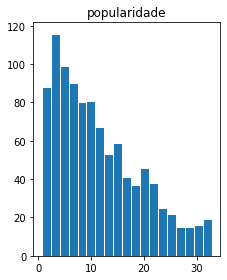

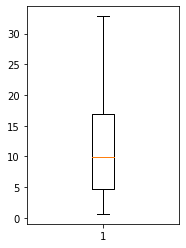

In [15]:
faixa_pop= np.linspace(filtro['tmdb_popularity'].min(), filtro['tmdb_popularity'].max(), 20)
plt.subplot(121) 
plt.hist(filtro['tmdb_popularity'], faixa_pop, edgecolor='white')
plt.title("popularidade")

plt.tight_layout()
plt.show()

plt.subplot(122)
plt.boxplot(filtro['tmdb_popularity'])
plt.show()

In [16]:
nota_imdb= filtro.imdb_score
nota_tmdb= filtro.tmdb_score
duracao= filtro.runtime
votos_imdb= filtro.imdb_votes
lancamento= filtro.release_year
popularidade= filtro.tmdb_popularity

Para analisar a frequêncidas dos dados, fizemos um histograma e um describe() de cada uma das variáveis quantitativas

In [17]:

def hist(var): 
    faixa_var = np.linspace(var.min(), var.max(), 20)
    plt.hist(var,faixa_var , edgecolor='white', density=True)
    plt.title(var.name)

    return(plt.show())
faixa_votos= np.linspace(votos_imdb.min(), votos_imdb.max(), 30)
faixa_nota_imdb= np.linspace(nota_imdb.min(), nota_imdb.max(), 20)
faixa_nota_tmdb= np.linspace(nota_imdb.min(), nota_imdb.max(), 20)


In [18]:
nota_imdb.describe()

count    1007.000000
mean        6.335750
std         1.092816
min         2.000000
25%         5.600000
50%         6.400000
75%         7.100000
max         8.900000
Name: imdb_score, dtype: float64

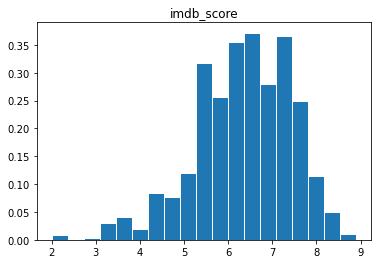

In [19]:
hist(nota_imdb)

In [20]:
nota_tmdb.describe()

count    1007.000000
mean        6.477150
std         0.897289
min         2.000000
25%         6.000000
50%         6.500000
75%         7.100000
max        10.000000
Name: tmdb_score, dtype: float64

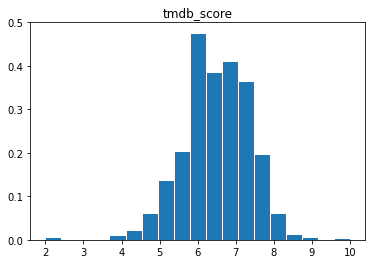

In [21]:
hist(nota_tmdb)

In [22]:
duracao.describe()

count    1007.000000
mean      106.665343
std        27.717695
min        13.000000
25%        92.000000
50%       104.000000
75%       122.000000
max       224.000000
Name: runtime, dtype: float64

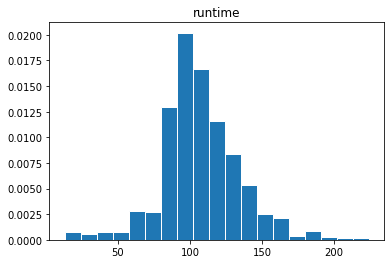

In [23]:
hist(duracao)

In [24]:
votos_imdb.describe() 

count      1007.000000
mean      37486.551142
std       75554.009033
min           9.000000
25%        2269.500000
50%        8268.000000
75%       35349.000000
max      841435.000000
Name: imdb_votes, dtype: float64

O desvio padrão dos valores dos votos é muito alto, logo é importante retirar os valores absurdos para analisar seu histograma

In [25]:
Qter_= votos_imdb.quantile(0.75)
Qpri_= votos_imdb.quantile(0.25)
iq_= Qter_ - Qpri_
LS_ = Qter_ + 1.5*iq_
LI_ = Qpri_ - 1.5*iq_
filtro_votos = filtro.loc[(votos_imdb>LI_)&(votos_imdb<LS_)]
votos_filtrado= filtro_votos.imdb_votes

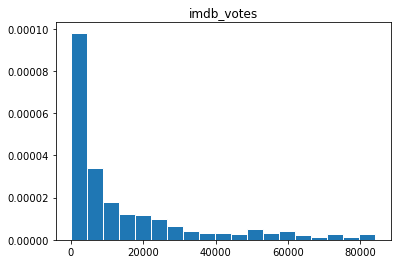

In [26]:
hist(votos_filtrado)

In [27]:
lancamento.describe()

count    1007.000000
mean     2014.001986
std         8.129909
min      1966.000000
25%      2012.000000
50%      2017.000000
75%      2019.000000
max      2022.000000
Name: release_year, dtype: float64

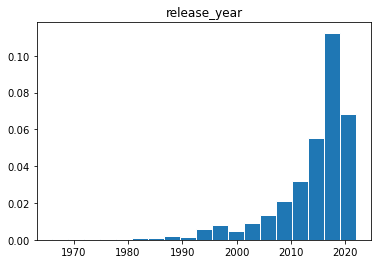

In [28]:
hist(lancamento)

Em seguida fizemos a correlação da popularidade com essas variáveis. A correlação é um cálculo estatístico que torna possível a comparação de dois grupos de dados e, dessa forma, entender como eles se relacionam entre si. Percebendo alguma covariância alta entre as variáveis é possível entender melhor o que influencia cada coisa

<AxesSubplot:>

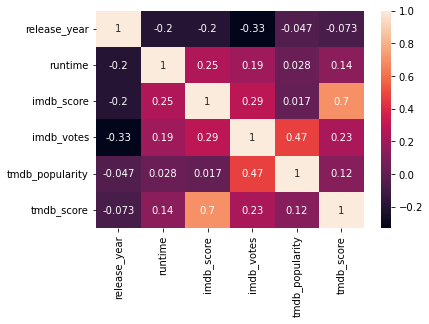

In [29]:
correlacao= filtro.corr()
sns.heatmap(correlacao,annot=True)


Depois comparamos todas as variáveis quantitativas entre si

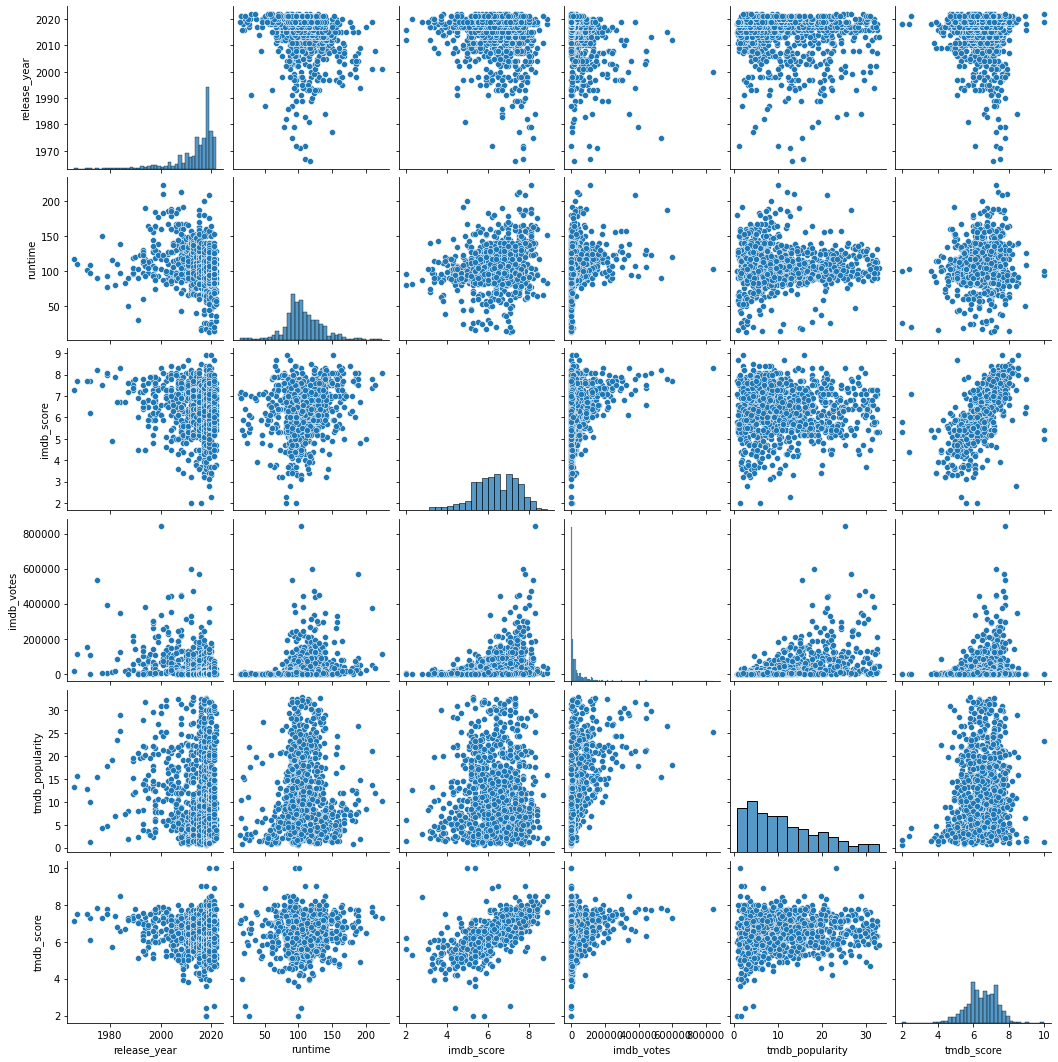

In [30]:
sns.pairplot(filtro, hue = None)
plt.show() 

para ter mais variáveis em análise, já que a maioria dos dados não tem muita correlação entre si fizemos uma seleção dos gêneros que mais aparecem para criar uma nova coluna no dataframe que indica se o filme é do respectivo gênero ou não e depois comparar a classificação do filme com a popularidade

In [31]:
from funcoes import generos

importing Jupyter notebook from funcoes.ipynb
Fizemos a função gênero para conseguir analisar, dado a nossa target = popularidade dos filmes,
qual a relação entre o gênero dele e a sua popularidade
essa é a base de dados com alguns gêneros aplicados pela função


<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\55119\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Para saber quais os gêneros mais comuns nos filmes e eliminar os menos relevantes, fizemos essa função para analisar gênero e popularidade, que recebe a base de dados e retorna uma lista com todos os gêneros
['[', "'", 'd', 'o', 'c', 'u', 'm', 'e', 'n', 't', 'a', 'i', ']', 'r', ',', ' ', 'h', 'l', 'p', 'f', 's', 'y', 'w']


In [32]:
dados_comedia = generos('comedy', filtro)
dados_romance = generos('romance', filtro)
dados_drama = generos('drama', filtro)
dados_acao = generos('action', filtro)
dados_fantasia = generos('fantasy', filtro)
dados_horror = generos('horror', filtro)
filtro.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,comedy,romance,drama,action,fantasy,horror
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0,10.010,7.300,0,0,1,1,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0,15.461,7.811,1,0,0,1,1,0
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],tt0079470,8.0,395024.0,17.770,7.800,1,0,0,0,0,0
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],tt0066999,7.7,155051.0,12.817,7.500,0,0,0,1,0,0
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],tt0061418,7.7,112048.0,15.687,7.500,0,0,1,1,0,0


In [33]:
g_nota_imdb= filtro.imdb_score
g_nota_tmdb= filtro.tmdb_score
g_duracao= filtro.runtime
g_votos_imdb= filtro.imdb_votes
g_lancamento= filtro.release_year
g_popularidade= filtro.tmdb_popularity

Com as variáveis qualitativas, fizemos a análise delas com a popularidade para ver se tem alguma correlação entre elas

In [34]:

def hist(genero, v):
    colors = ['red', 'pink', 'green', 'purple', 'yellow', 'blue', 'orange', 'brown', 'grey']
    d0 = filtro.loc[filtro[genero]==0, v]
    d1 = filtro.loc[filtro[genero]==1, v]
    d0.hist(color=random.choice(colors), density=True, alpha=0.5, label='0')
    d1.hist(color=random.choice(colors), density=True, alpha=0.5, label='1')
    plt.title(genero)
    plt.xlabel('popularidade')
    plt.ylabel('densidade')
    plt.legend()
    return(plt.show())

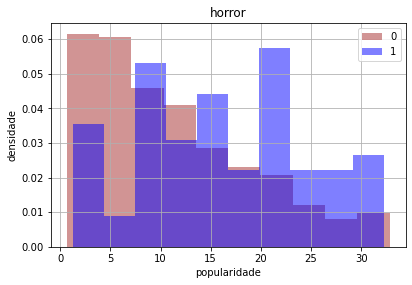

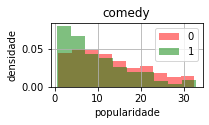

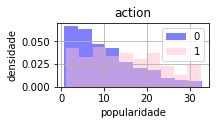

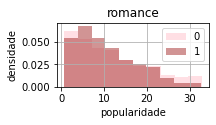

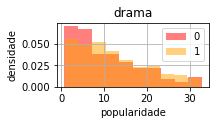

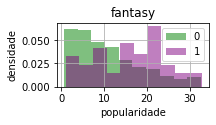

In [35]:
fig = plt.figure(figsize=(14, 14))

plt.subplot(321)
hist('horror', 'tmdb_popularity')

plt.subplot(322)
hist('comedy', 'tmdb_popularity')

plt.subplot(323)
hist('action', 'tmdb_popularity')

plt.subplot(324)
hist('romance', 'tmdb_popularity')

plt.subplot(325)
hist('drama', 'tmdb_popularity')

plt.subplot(326)
hist('fantasy', 'tmdb_popularity')

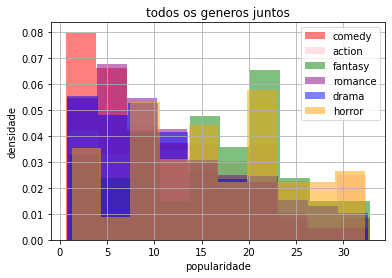

In [36]:
generos = ['comedy', 'action', 'fantasy', 'romance', 'drama', 'horror']
colors = ['red', 'pink', 'green', 'purple', 'blue', 'orange']
i=0
for genero in generos:
    d = filtro.loc[filtro[genero]==1, 'tmdb_popularity']
    d.hist(color=colors[i], density=True, alpha=0.5, label=genero)
    i+=1
plt.title("todos os generos juntos")    
plt.xlabel('popularidade')
plt.ylabel('densidade')
plt.legend()

Com a análise exploratória feita começamos com as devidas técnicas para predição dos dados

Começamos dividindo o dataset em train e teste, sendo 80% train e 20% teste e nomeamos X e Y para o devido modelo de regressão linear que vamos testar 

In [37]:
from sklearn.model_selection import train_test_split
X = filtro[['runtime', 'imdb_score', 'imdb_votes', 'tmdb_score', 'release_year']]
y = filtro.tmdb_popularity
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)
#Desicion Tree regressor
#dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=0, random_state=1)
X_train.shape


(805, 5)

In [38]:
X_train = X_train.dropna()
X_train.isna().sum()
y_train = y_train.dropna()
y_train.isna().sum()
X_test =  X_test.dropna()
X_test.isna().sum()
y_test =  y_test.dropna()
y_test.isna().sum()

0

In [39]:
#Primeiramente fizemos regressão linear das features iniciais com popularidade
import statsmodels.api as sm
def regress(Y,X):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results
X = X_train[['runtime', 'imdb_score', 'imdb_votes', 'tmdb_score', 'release_year']]
Y = y_train
results = regress(Y,X)
results.summary()

c:\Users\55119\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tmdb_popularity   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     60.00
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           4.22e-53
Time:                        18:23:40   Log-Likelihood:                -2688.3
No. Observations:                 805   AIC:                             5389.
Df Residuals:                     799   BIC:                             5417.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -149.4501     64.512     -2.317      0.021    -276.083     -22.817
runtime         -0.0094      0.009     -1.054      0.292      -0.027       0.008
imdb_score      -1.5585      0.315     -4.946      0.000      -2.177      -0.940
imdb_votes    6.049e-05   3.65e-06     16.590      0.000    5.33e-05    6.76e-05
tmdb_score       1.2366      0.360      3.438      0.001       0.531       1.943
release_year     0.0802      0.032      2.511      0.012       0.018       0.143
==============================================================================
Omnibus:                       77.353   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.190
Skew:                           0.732   Prob(JB):                     5.30e-24
Kurtosis:                       4.026   Cond. No.                     2.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X = X_train[['imdb_score', 'imdb_votes', 'tmdb_score', 'release_year']]
Y = y_train
results = regress(Y,X)
results.summary()

c:\Users\55119\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tmdb_popularity   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     74.72
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           7.93e-54
Time:                        18:23:44   Log-Likelihood:                -2688.9
No. Observations:                 805   AIC:                             5388.
Df Residuals:                     800   BIC:                             5411.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -158.8040     63.903     -2.485      0.013    -284.240     -33.368
imdb_score      -1.6168      0.310     -5.212      0.000      -2.226      -1.008
imdb_votes    6.008e-05   3.63e-06     16.572      0.000     5.3e-05    6.72e-05
tmdb_score       1.2519      0.359      3.483      0.001       0.546       1.957
release_year     0.0845      0.032      2.667      0.008       0.022       0.147
==============================================================================
Omnibus:                       77.177   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.421
Skew:                           0.739   Prob(JB):                     1.28e-23
Kurtosis:                       3.980   Cond. No.                     2.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

((array([-3.13451857e+00, -2.86438262e+00, -2.71330502e+00, -2.60658839e+00,
         -2.52322891e+00, -2.45440960e+00, -2.39556084e+00, -2.34399737e+00,
         -2.29800241e+00, -2.25640948e+00, -2.21838865e+00, -2.18332764e+00,
         -2.15076141e+00, -2.12032814e+00, -2.09174058e+00, -2.06476676e+00,
         -2.03921654e+00, -2.01493207e+00, -1.99178081e+00, -1.96965033e+00,
         -1.94844446e+00, -1.92808020e+00, -1.90848549e+00, -1.88959727e+00,
         -1.87136007e+00, -1.85372485e+00, -1.83664797e+00, -1.82009048e+00,
         -1.80401744e+00, -1.78839738e+00, -1.77320185e+00, -1.75840507e+00,
         -1.74398355e+00, -1.72991589e+00, -1.71618247e+00, -1.70276532e+00,
         -1.68964787e+00, -1.67681488e+00, -1.66425223e+00, -1.65194688e+00,
         -1.63988670e+00, -1.62806043e+00, -1.61645758e+00, -1.60506835e+00,
         -1.59388359e+00, -1.58289475e+00, -1.57209379e+00, -1.56147317e+00,
         -1.55102583e+00, -1.54074508e+00, -1.53062465e+00, -1.52065860e+00,

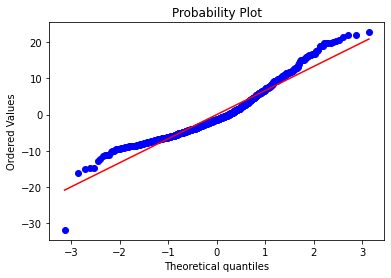

In [41]:
from scipy.stats import norm,probplot

probplot(results.resid, dist='norm', plot=plt)

In [42]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)


In [43]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(max_depth=10, random_state=1)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)


0.0

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.0049504950495049506

O último modelo que vamos usar o K- Nearest Neighbors, no qual conseguimos avaliar as variáveis qualitativas também, mas para que ele funcione precisamos colocar todos os dados na mesmo intervalo, utilizamos, variando de 0 a 10

In [ ]:
def normalizacao():